# REAL MISSINGNESS

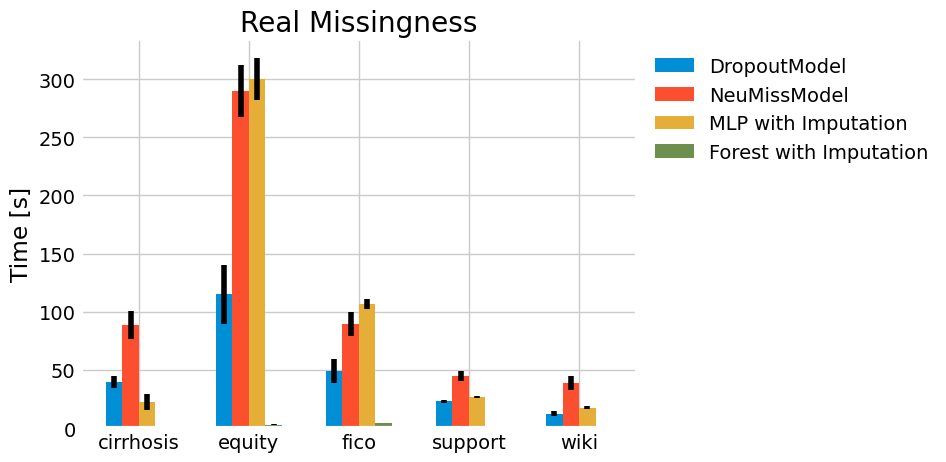

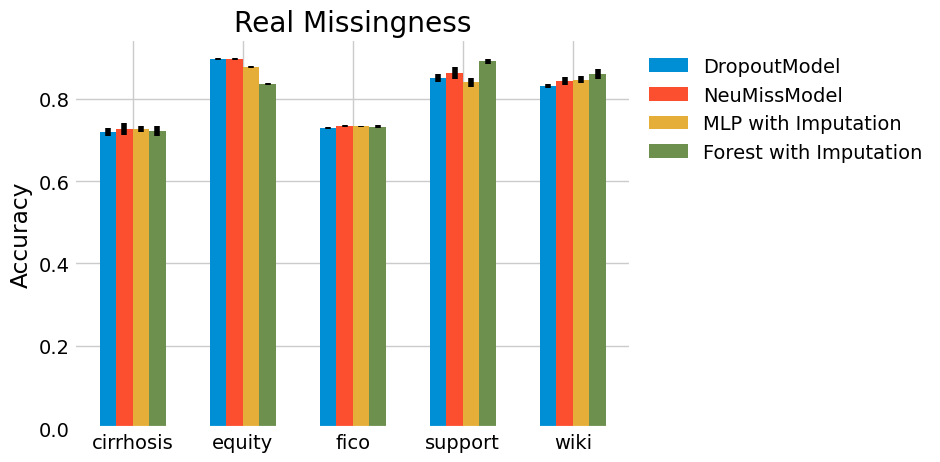

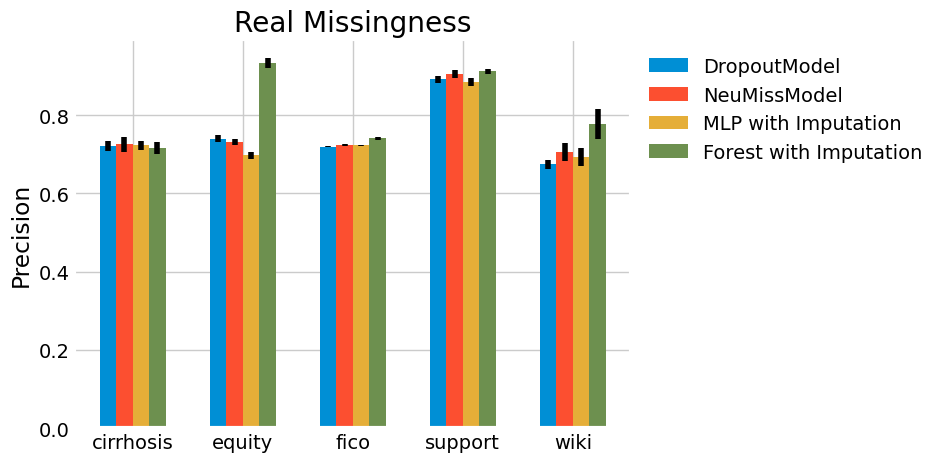

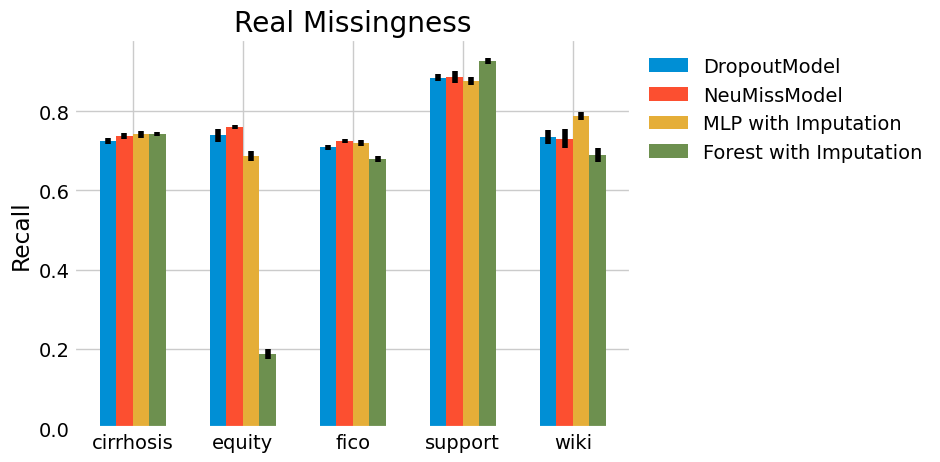

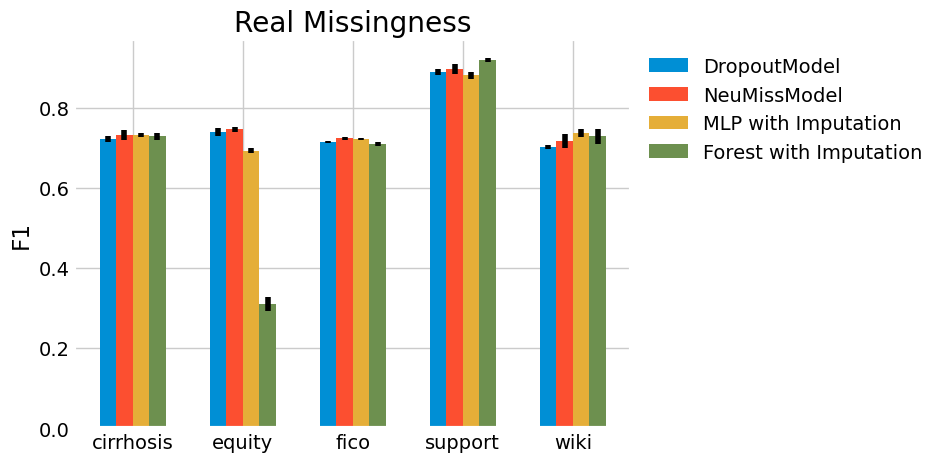

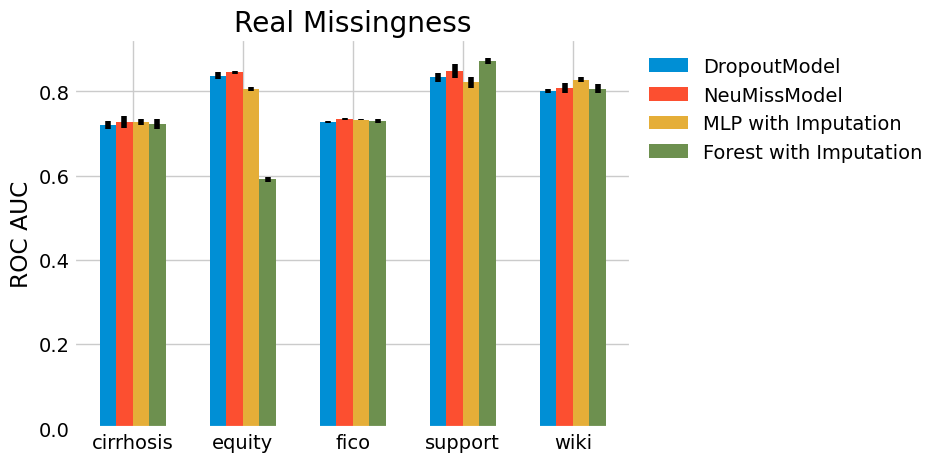

In [73]:
import os
import numpy as np
import matplotlib.pyplot as plt

model1_data = np.load('../results/raw/results_dropout_real.npy')
model2_data = np.load('../results/raw/results_neumiss_real.npy')
model3_data = np.load('../results/raw/results_mlp_real.npy')
model4_data = np.load('../results/raw/results_forest_real.npy')

metrics = ['Time [s]', 'MSE', 'MAE', 'R2', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
num_datasets, num_reps, num_metrics = model1_data.shape
directory = '../processed_data/yes_miss'
datasets = os.listdir(directory)

# Set the width of the bars
bar_width = 0.15

# Generate plots for each metric

# set theme thirtyeight
for metric_idx in range(num_metrics):
    if np.isnan(model1_data[:, :, metric_idx]).any():
        continue
    means_model1 = model1_data[:, :, metric_idx].mean(axis=1)
    sems_model1 = model1_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    means_model2 = model2_data[:, :, metric_idx].mean(axis=1)
    sems_model2 = model2_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model3 = model3_data[:, :, metric_idx].mean(axis=1)
    sems_model3 = model3_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model4 = model4_data[:, :, metric_idx].mean(axis=1)
    sems_model4 = model4_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    # Indices for the bars
    indices = np.arange(num_datasets)
    
    fig, ax = plt.subplots()
    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.facecolor'] = 'white'
    bars1 = ax.bar(indices - 3*bar_width/2, means_model1, bar_width, yerr=sems_model1, label='DropoutModel')
    bars2 = ax.bar(indices - bar_width/2, means_model2, bar_width, yerr=sems_model2, label='NeuMissModel')
    bars3 = ax.bar(indices + bar_width/2, means_model3, bar_width, yerr=sems_model3, label='MLP with Imputation')
    bars4 = ax.bar(indices + 3*bar_width/2, means_model4, bar_width, yerr=sems_model4, label='Forest with Imputation')
    
    ax.set_title('Real Missingness')
    ax.set_ylabel(metrics[metric_idx])
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{datasets[i][:-4]}' for i in range(num_datasets)])

    # Move legend outside the plot
    for spine in ax.spines.values():
        spine.set_color('white')
    ax.set_facecolor('white')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='white', framealpha=0)

    plt.savefig(f'../results/plots/{metrics[metric_idx]}_real.png', bbox_inches='tight', facecolor='white')

    # plt.tight_layout()
    plt.show()


# MNAR

### Regression

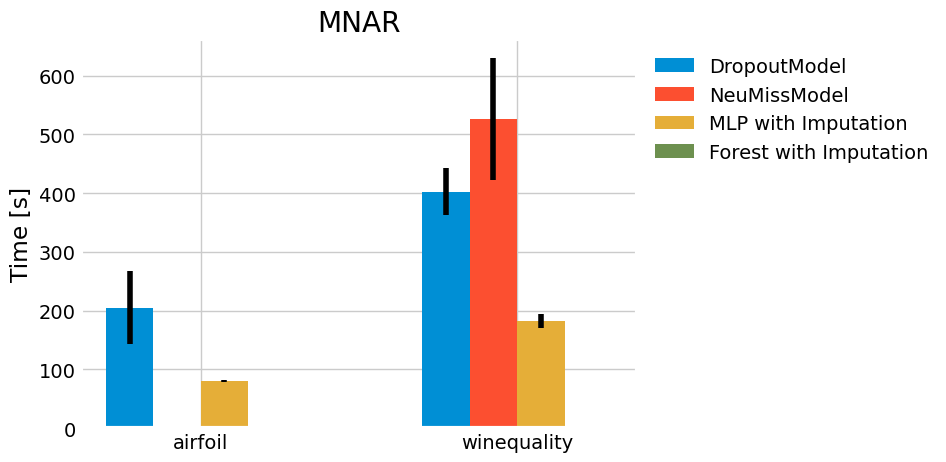

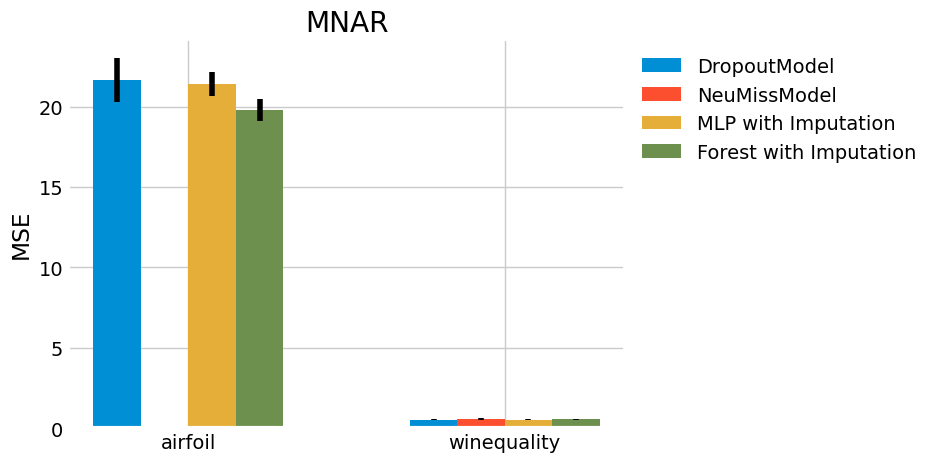

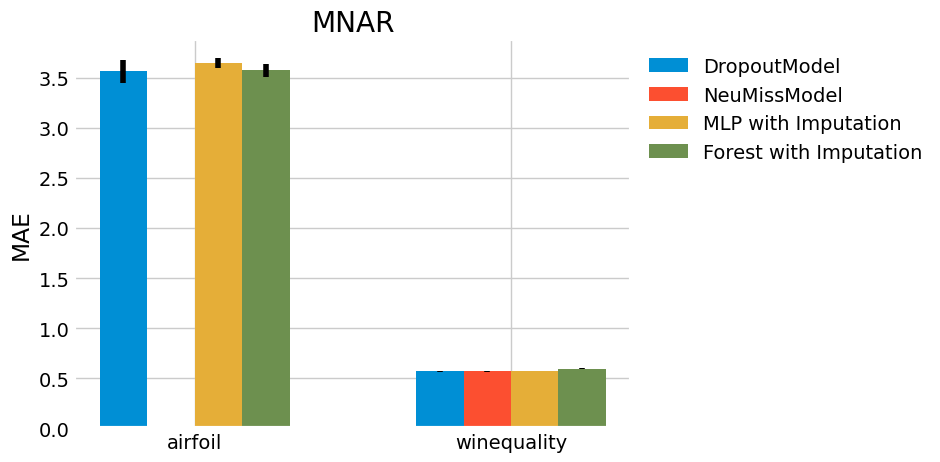

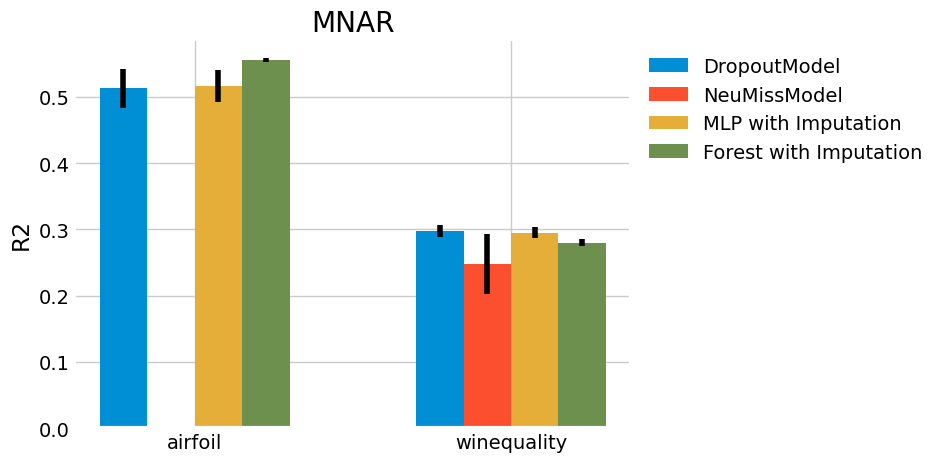

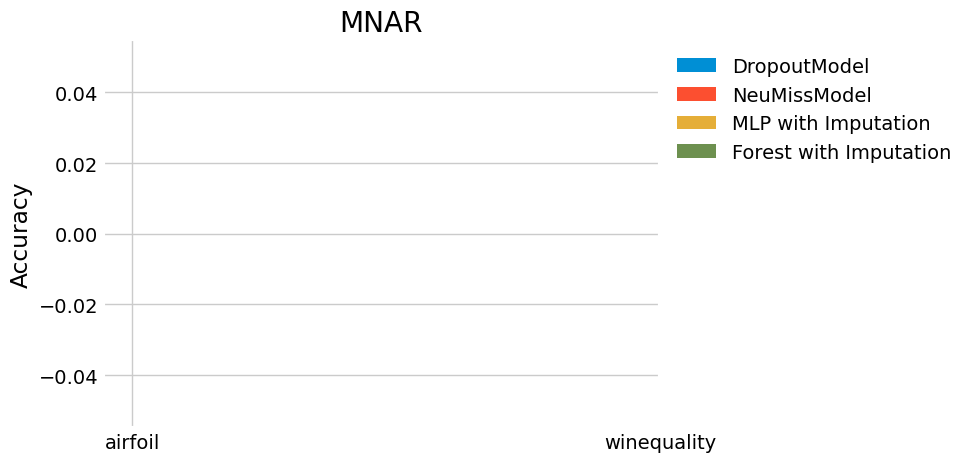

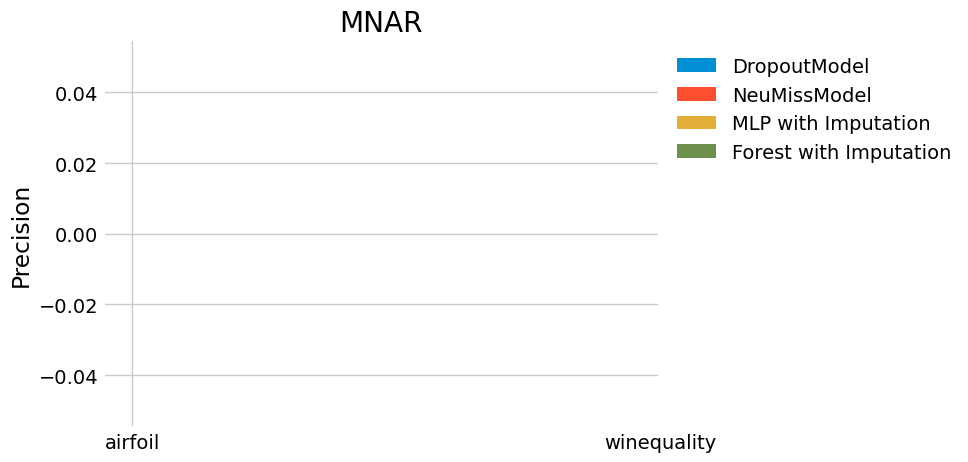

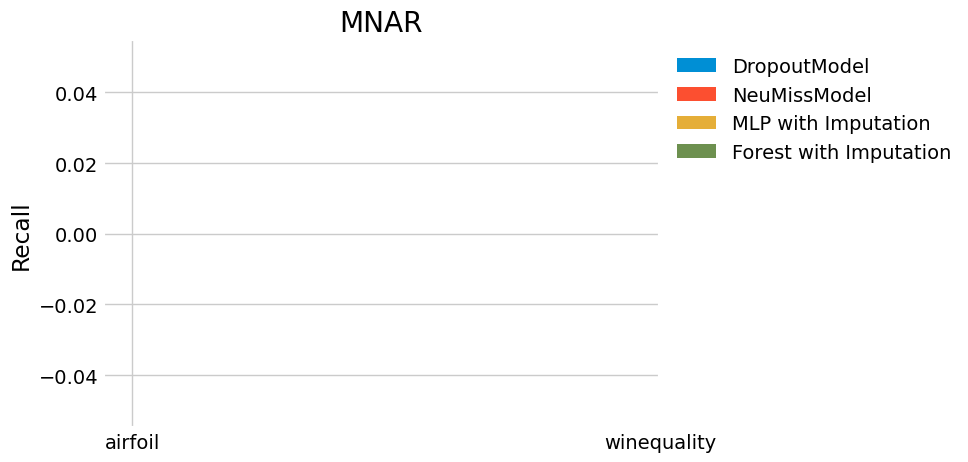

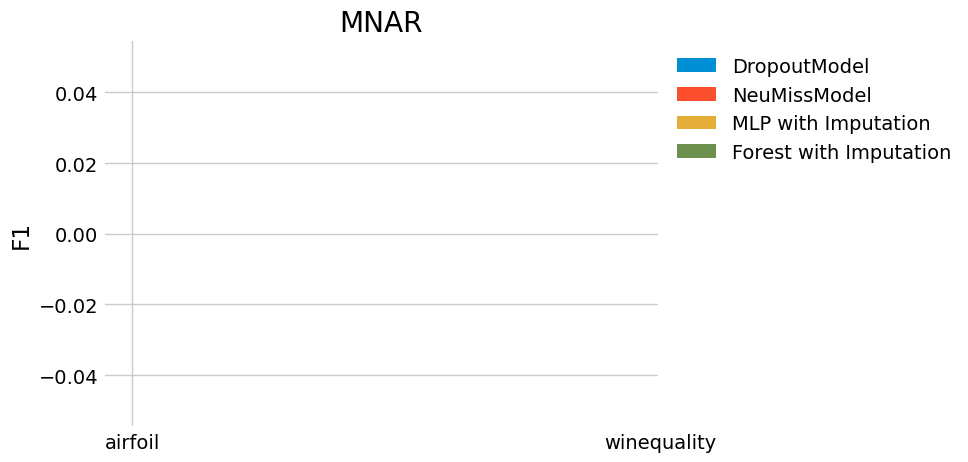

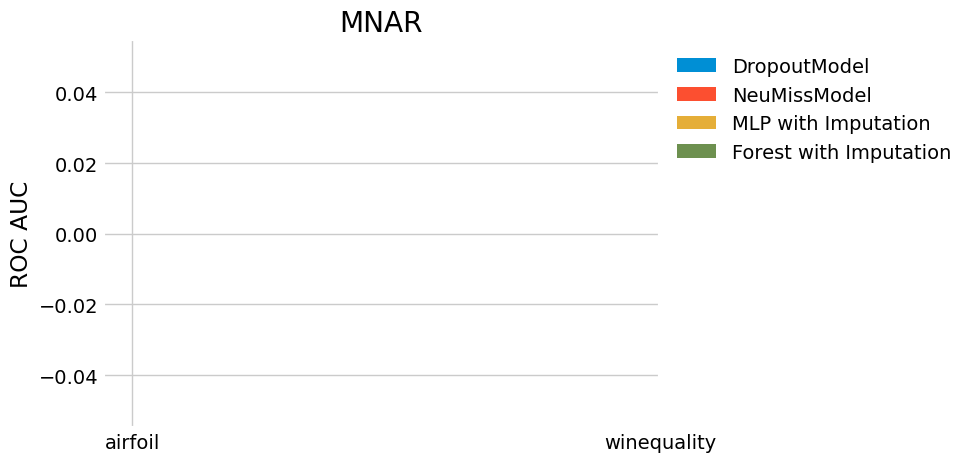

In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt

model1_data = np.load('../results/raw/results_dropout_MNAR.npy')[[0, -1], :, :]
model2_data = np.load('../results/raw/results_neumiss_MNAR.npy')[[0, -1], :, :]
model3_data = np.load('../results/raw/results_mlp_MNAR.npy')[[0, -1], :, :]
model4_data = np.load('../results/raw/results_forest_MNAR.npy')[[0, -1], :, :]

for dataset in model2_data:
    for experiment in dataset:
        if experiment[3] < 0:
            experiment[0:4] = np.nan

metrics = ['Time [s]', 'MSE', 'MAE', 'R2', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
num_datasets, num_reps, num_metrics = model1_data.shape
datasets = ['airfoil.csv', 'winequality.csv']

# Set the width of the bars
bar_width = 0.15

# Generate plots for each metric

# set theme thirtyeight
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
for metric_idx in range(num_metrics):
    # if np.isnan(model1_data[:, :, metric_idx]).any():
    #     continue
    means_model1 = model1_data[:, :, metric_idx].mean(axis=1)
    sems_model1 = model1_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    means_model2 = model2_data[:, :, metric_idx].mean(axis=1)
    sems_model2 = model2_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model3 = model3_data[:, :, metric_idx].mean(axis=1)
    sems_model3 = model3_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model4 = model4_data[:, :, metric_idx].mean(axis=1)
    sems_model4 = model4_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    # Indices for the bars
    indices = np.arange(num_datasets)
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(indices - 3*bar_width/2, means_model1, bar_width, yerr=sems_model1, label='DropoutModel')
    bars2 = ax.bar(indices - bar_width/2, means_model2, bar_width, yerr=sems_model2, label='NeuMissModel')
    bars3 = ax.bar(indices + bar_width/2, means_model3, bar_width, yerr=sems_model3, label='MLP with Imputation')
    bars4 = ax.bar(indices + 3*bar_width/2, means_model4, bar_width, yerr=sems_model4, label='Forest with Imputation')
    
    ax.set_title('MNAR')
    ax.set_ylabel(metrics[metric_idx])
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{datasets[i][:-4]}' for i in range(num_datasets)])

    # Move legend outside the plot
    for spine in ax.spines.values():
        spine.set_color('white')
    ax.set_facecolor('white')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='white', framealpha=0)

    plt.savefig(f'../results/plots/{metrics[metric_idx]}_reg_MNAR.png', bbox_inches='tight', facecolor='white')

    # plt.tight_layout()
    plt.show()


### Classification

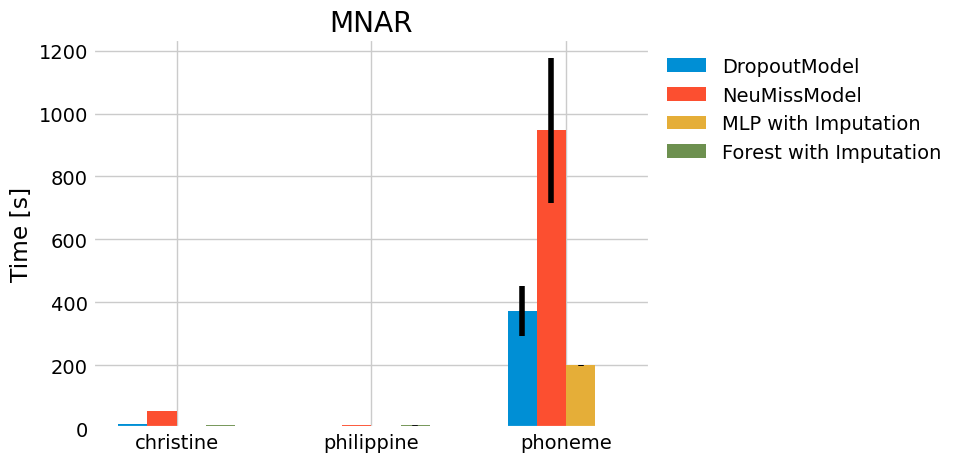

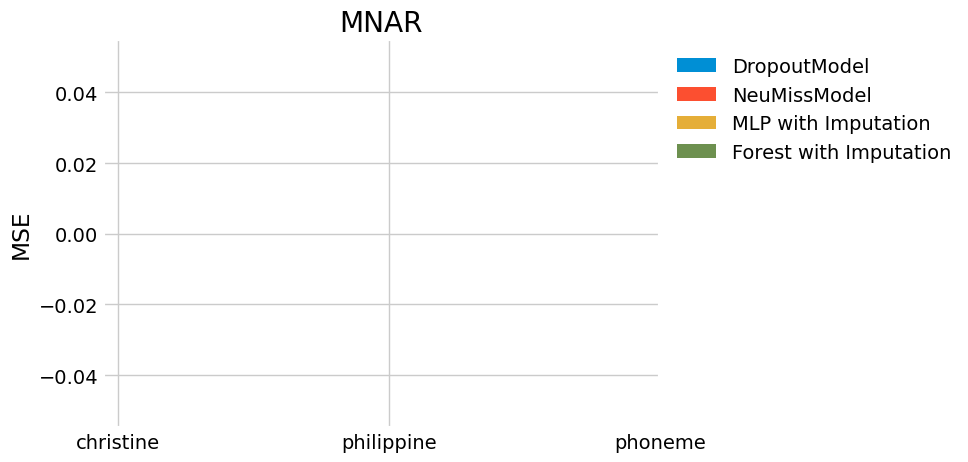

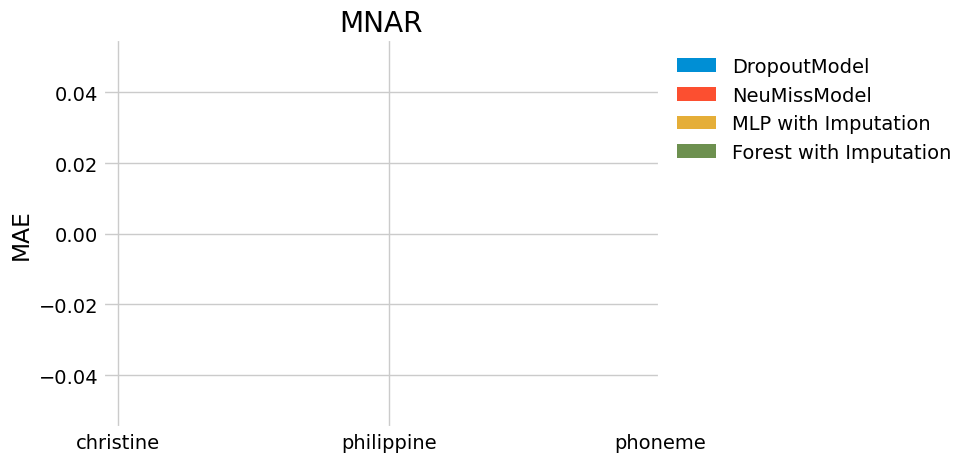

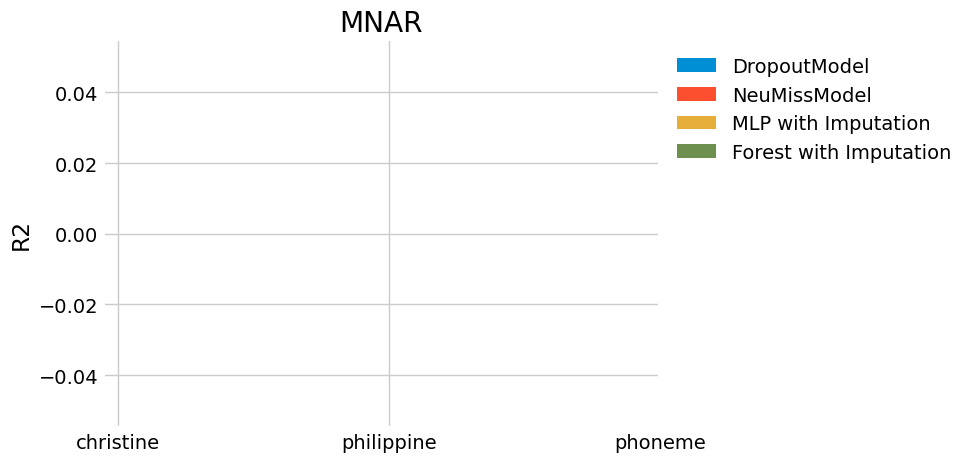

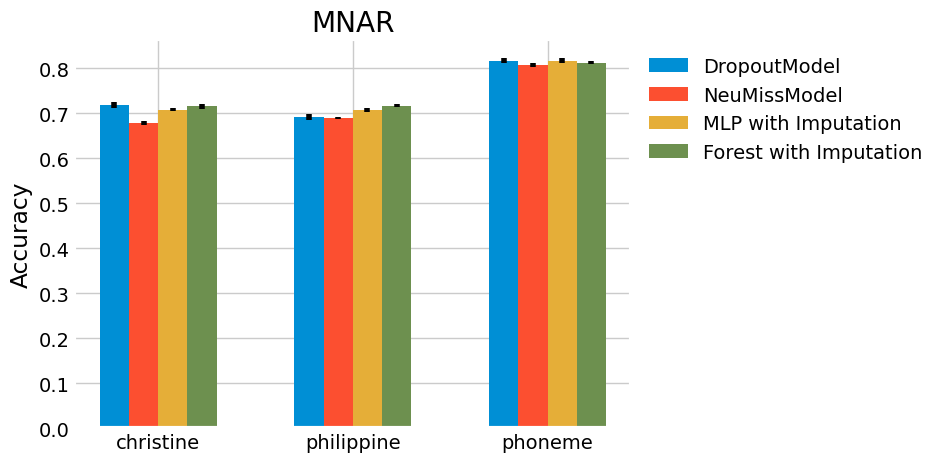

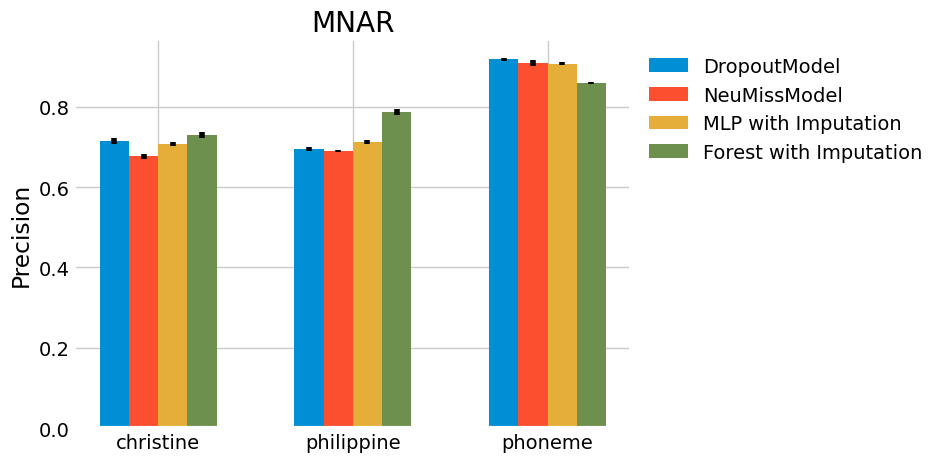

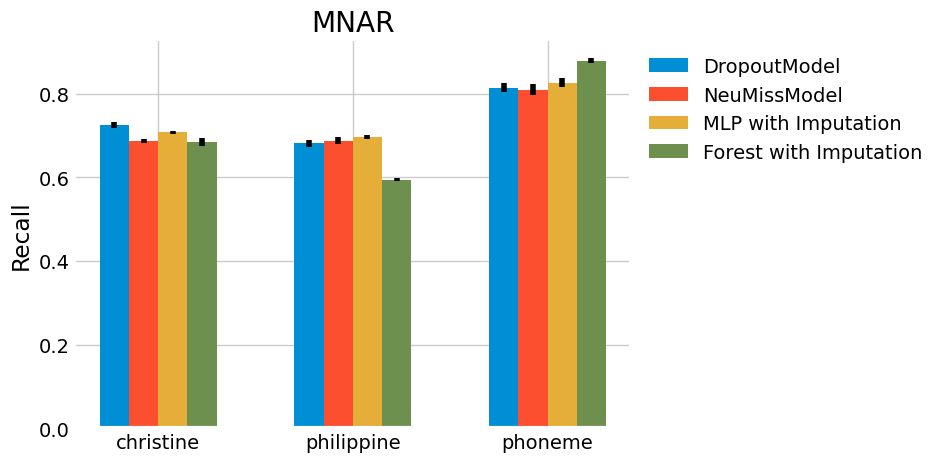

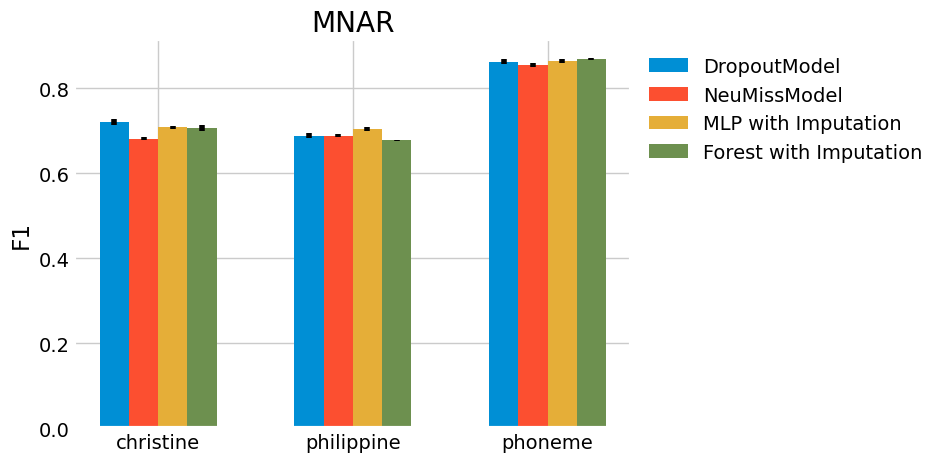

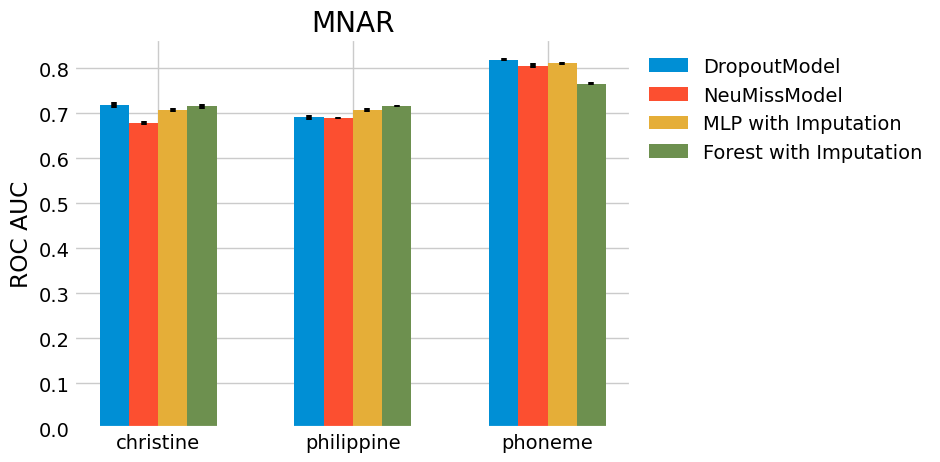

In [75]:
import os
import numpy as np
import matplotlib.pyplot as plt

model1_data = np.load('../results/raw/results_dropout_MNAR.npy')[1:4, :, :]
model2_data = np.load('../results/raw/results_neumiss_MNAR.npy')[1:4, :, :]
model3_data = np.load('../results/raw/results_mlp_MNAR.npy')[1:4, :, :]
model4_data = np.load('../results/raw/results_forest_MNAR.npy')[1:4, :, :]

metrics = ['Time [s]', 'MSE', 'MAE', 'R2', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
num_datasets, num_reps, num_metrics = model1_data.shape
datasets = ['christine.csv', 'philippine.csv', 'phoneme.csv']

# Set the width of the bars
bar_width = 0.15

# Generate plots for each metric

# set theme thirtyeight
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
for metric_idx in range(num_metrics):
    # if np.isnan(model1_data[:, :, metric_idx]).any():
    #     continue
    means_model1 = model1_data[:, :, metric_idx].mean(axis=1)
    sems_model1 = model1_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    means_model2 = model2_data[:, :, metric_idx].mean(axis=1)
    sems_model2 = model2_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model3 = model3_data[:, :, metric_idx].mean(axis=1)
    sems_model3 = model3_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model4 = model4_data[:, :, metric_idx].mean(axis=1)
    sems_model4 = model4_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    # Indices for the bars
    indices = np.arange(num_datasets)
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(indices - 3*bar_width/2, means_model1, bar_width, yerr=sems_model1, label='DropoutModel')
    bars2 = ax.bar(indices - bar_width/2, means_model2, bar_width, yerr=sems_model2, label='NeuMissModel')
    bars3 = ax.bar(indices + bar_width/2, means_model3, bar_width, yerr=sems_model3, label='MLP with Imputation')
    bars4 = ax.bar(indices + 3*bar_width/2, means_model4, bar_width, yerr=sems_model4, label='Forest with Imputation')
    
    ax.set_title('MNAR')
    ax.set_ylabel(metrics[metric_idx])
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{datasets[i][:-4]}' for i in range(num_datasets)])

    # Move legend outside the plot
    for spine in ax.spines.values():
        spine.set_color('white')
    ax.set_facecolor('white')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='white', framealpha=0)

    plt.savefig(f'../results/plots/{metrics[metric_idx]}_class_MNAR.png', bbox_inches='tight', facecolor='white')

    # plt.tight_layout()
    plt.show()


# MCAR

### Regression

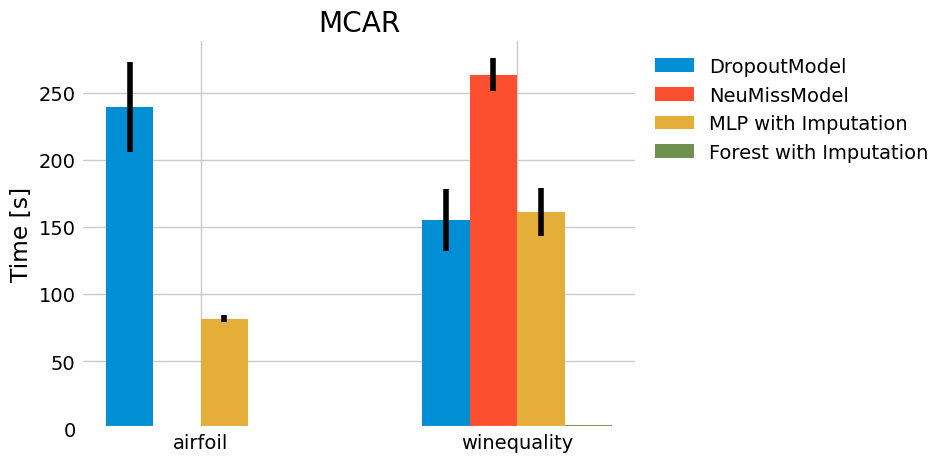

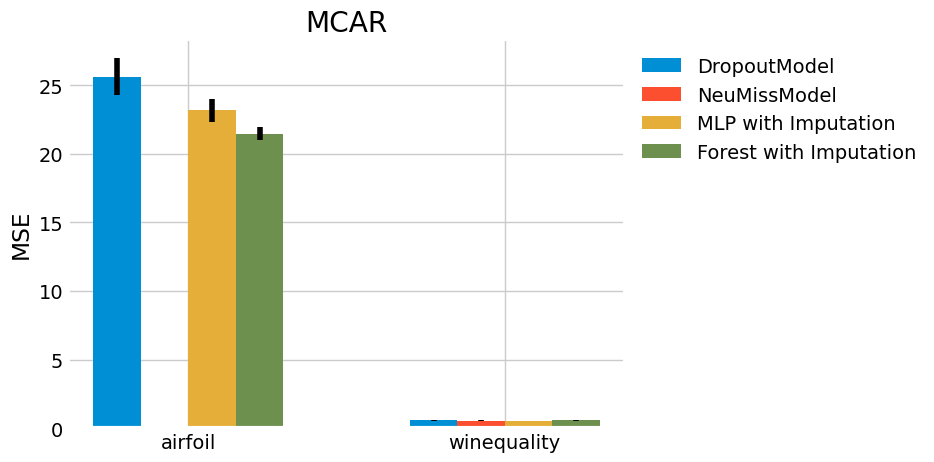

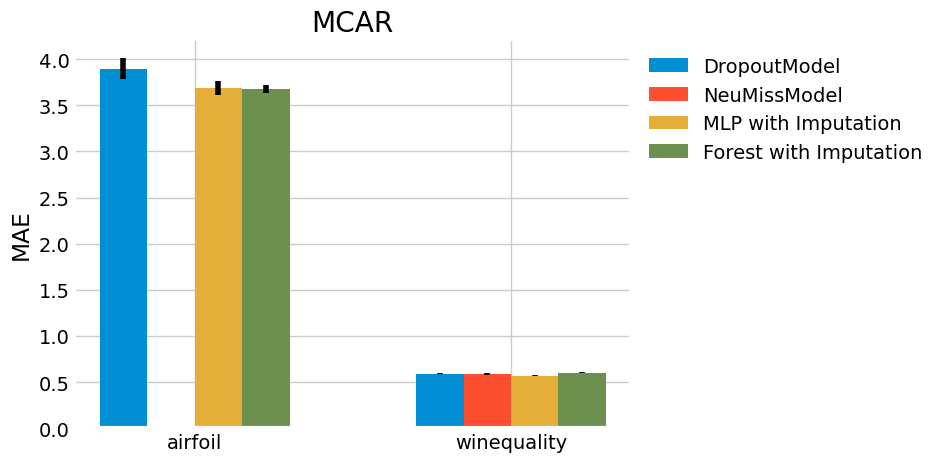

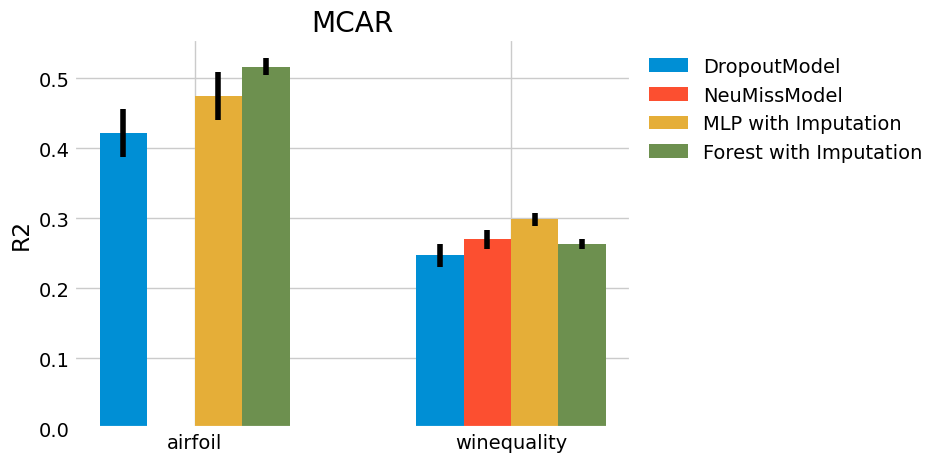

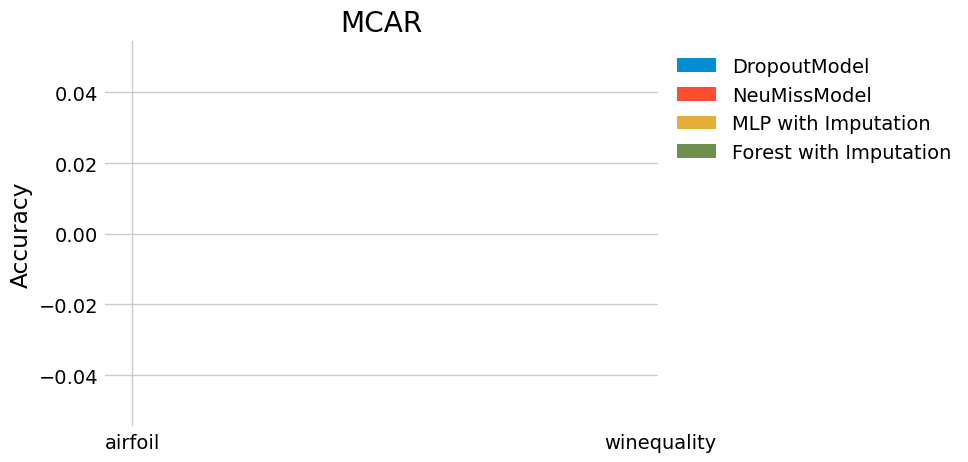

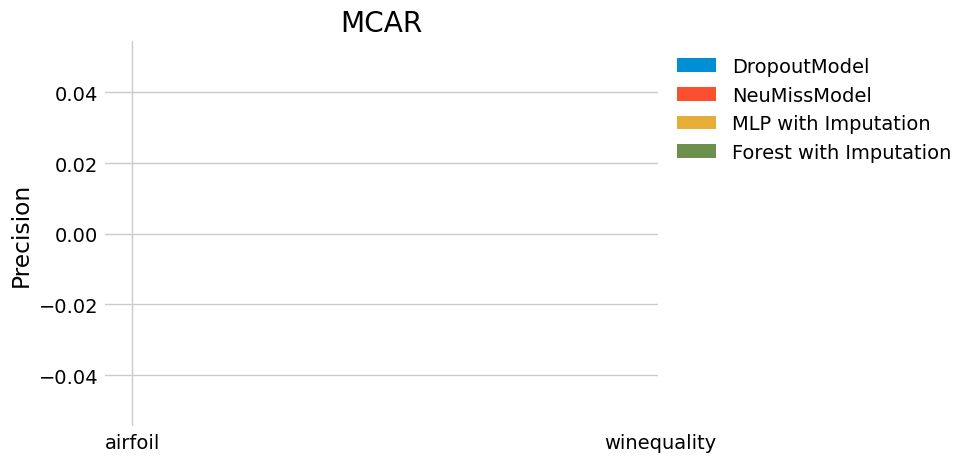

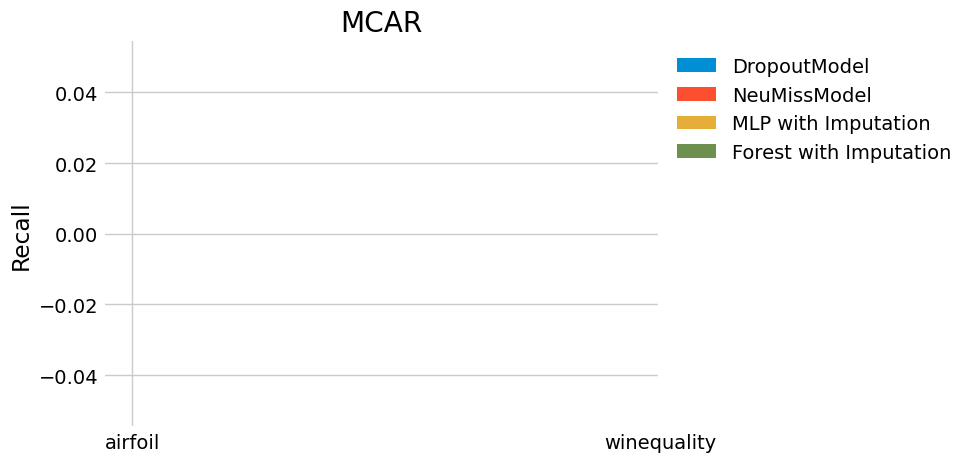

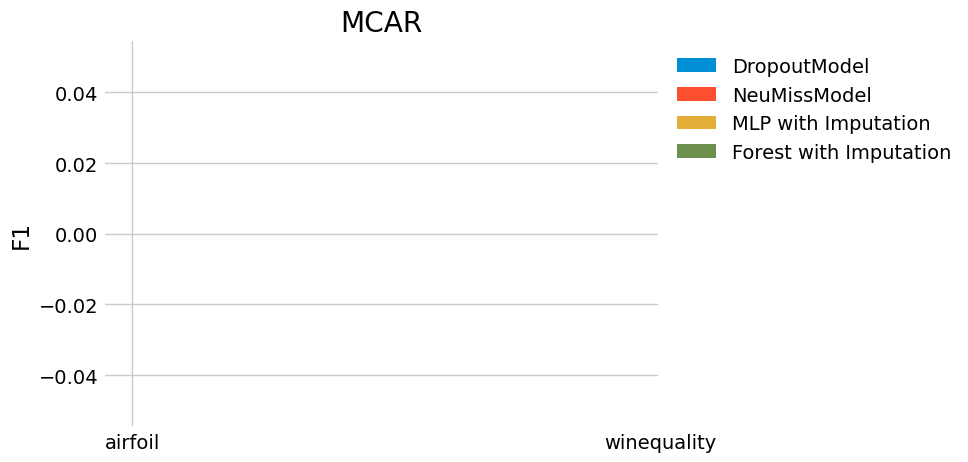

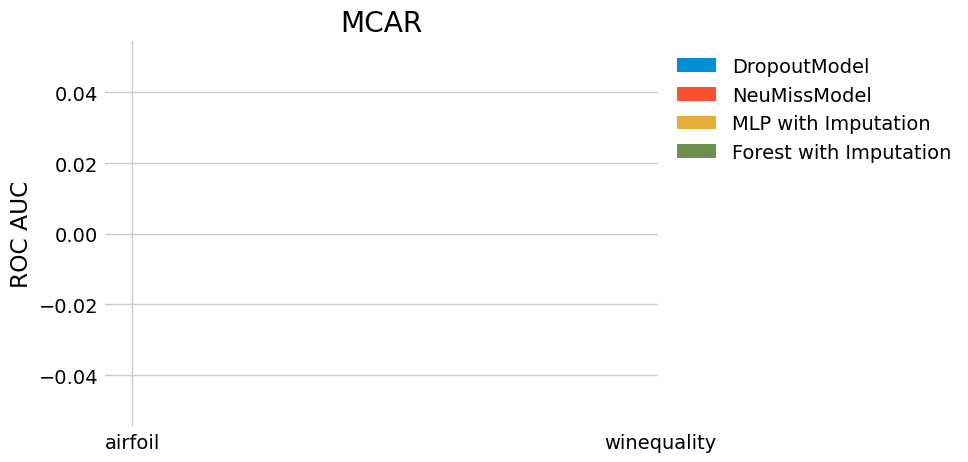

In [76]:
import os
import numpy as np
import matplotlib.pyplot as plt

model1_data = np.load('../results/raw/results_dropout_MCAR.npy')[[0, -1], :, :]
model2_data = np.load('../results/raw/results_neumiss_MCAR.npy')[[0, -1], :, :]
model3_data = np.load('../results/raw/results_mlp_MCAR.npy')[[0, -1], :, :]
model4_data = np.load('../results/raw/results_forest_MCAR.npy')[[0, -1], :, :]

for dataset in model2_data:
    for experiment in dataset:
        if experiment[3] < 0:
            experiment[0:4] = np.nan

metrics = ['Time [s]', 'MSE', 'MAE', 'R2', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
num_datasets, num_reps, num_metrics = model1_data.shape
datasets = ['airfoil.csv', 'winequality.csv']

# Set the width of the bars
bar_width = 0.15

# Generate plots for each metric

# set theme thirtyeight
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
for metric_idx in range(num_metrics):
    # if np.isnan(model1_data[:, :, metric_idx]).any():
    #     continue
    means_model1 = model1_data[:, :, metric_idx].mean(axis=1)
    sems_model1 = model1_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    means_model2 = model2_data[:, :, metric_idx].mean(axis=1)
    sems_model2 = model2_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model3 = model3_data[:, :, metric_idx].mean(axis=1)
    sems_model3 = model3_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model4 = model4_data[:, :, metric_idx].mean(axis=1)
    sems_model4 = model4_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    # Indices for the bars
    indices = np.arange(num_datasets)
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(indices - 3*bar_width/2, means_model1, bar_width, yerr=sems_model1, label='DropoutModel')
    bars2 = ax.bar(indices - bar_width/2, means_model2, bar_width, yerr=sems_model2, label='NeuMissModel')
    bars3 = ax.bar(indices + bar_width/2, means_model3, bar_width, yerr=sems_model3, label='MLP with Imputation')
    bars4 = ax.bar(indices + 3*bar_width/2, means_model4, bar_width, yerr=sems_model4, label='Forest with Imputation')
    
    ax.set_title('MCAR')
    ax.set_ylabel(metrics[metric_idx])
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{datasets[i][:-4]}' for i in range(num_datasets)])

    # Move legend outside the plot
    for spine in ax.spines.values():
        spine.set_color('white')
    ax.set_facecolor('white')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='white', framealpha=0)

    plt.savefig(f'../results/plots/{metrics[metric_idx]}_reg_MCAR.png', bbox_inches='tight', facecolor='white')

    # plt.tight_layout()
    plt.show()


### Classification

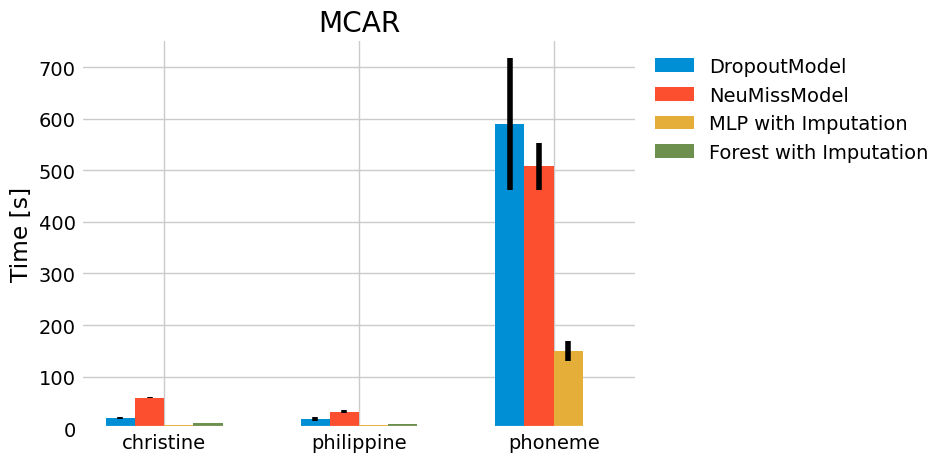

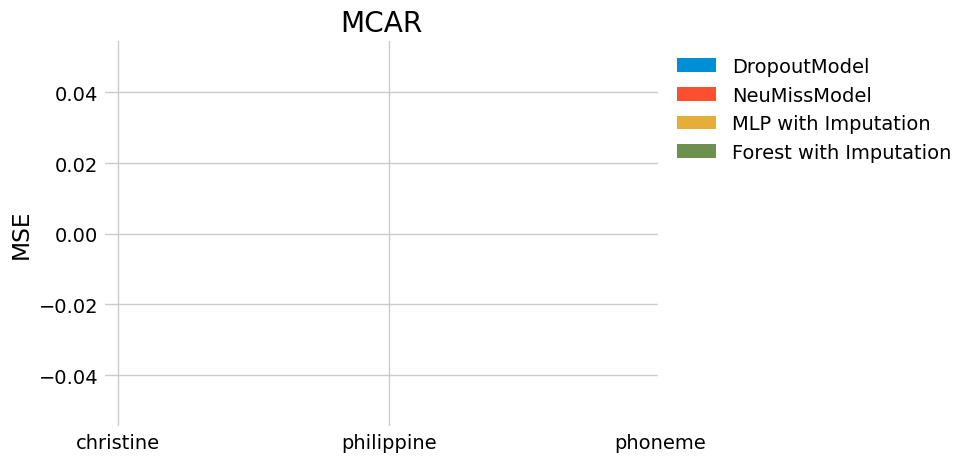

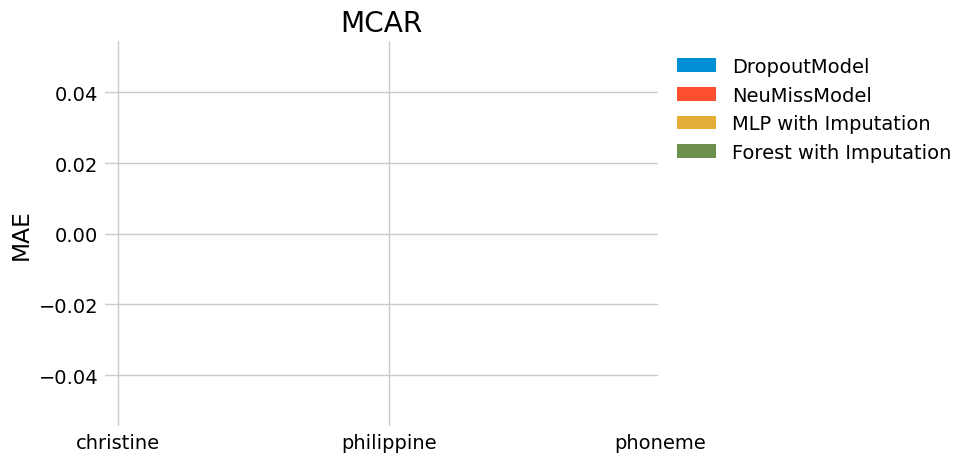

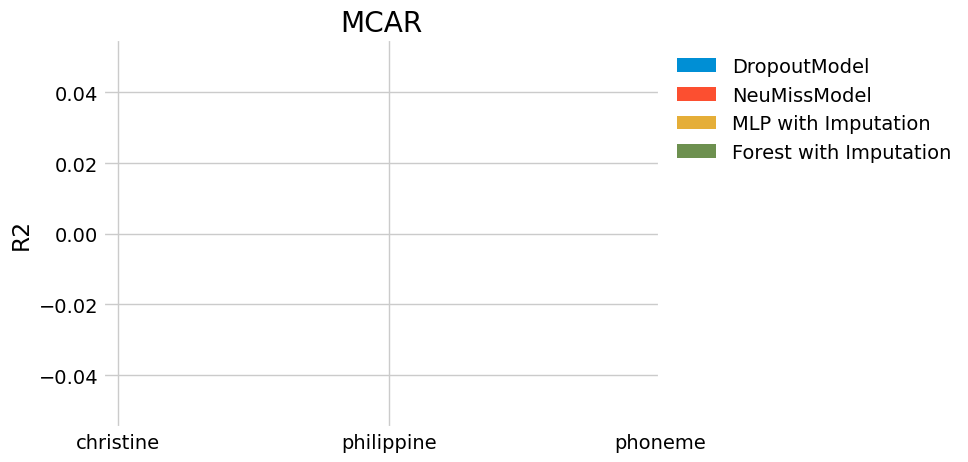

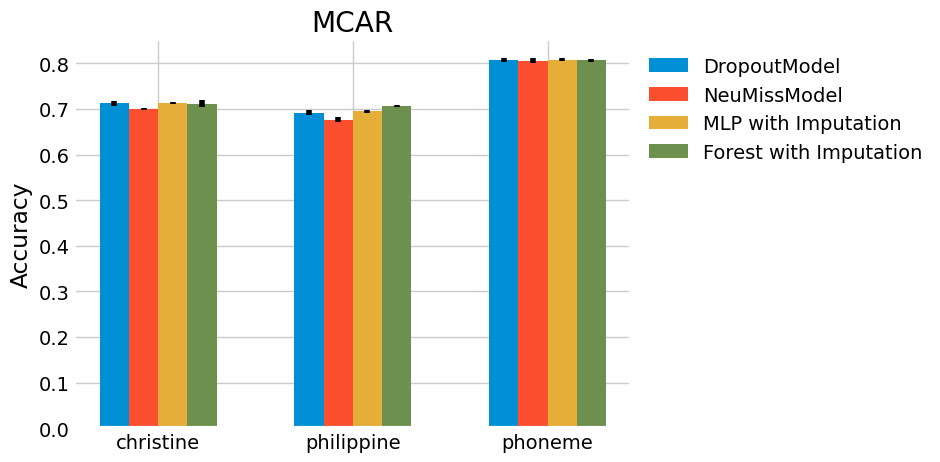

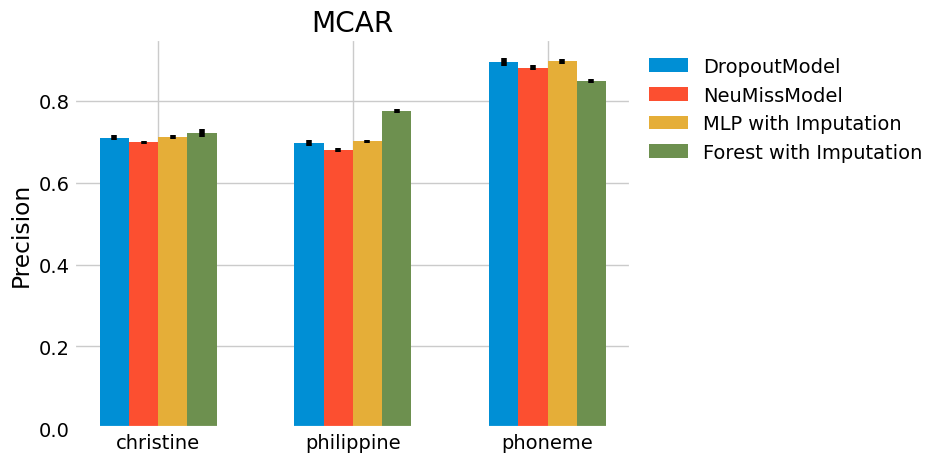

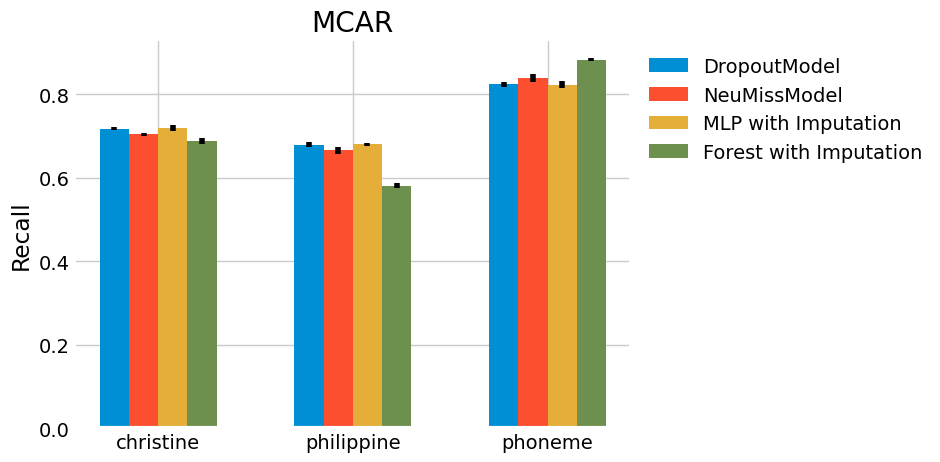

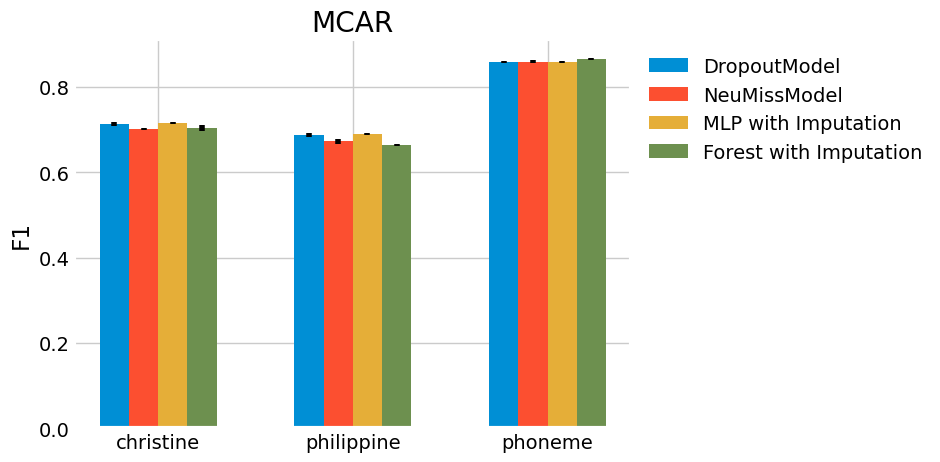

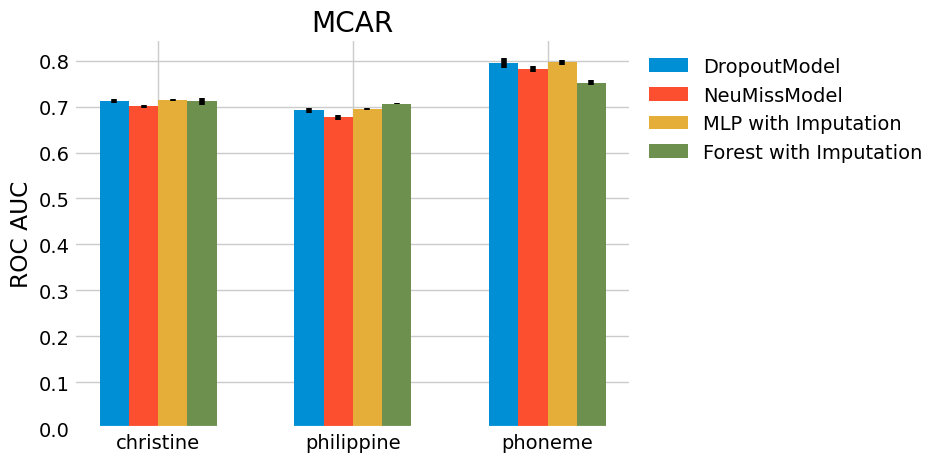

In [77]:
import os
import numpy as np
import matplotlib.pyplot as plt

model1_data = np.load('../results/raw/results_dropout_MCAR.npy')[1:4, :, :]
model2_data = np.load('../results/raw/results_neumiss_MCAR.npy')[1:4, :, :]
model3_data = np.load('../results/raw/results_mlp_MCAR.npy')[1:4, :, :]
model4_data = np.load('../results/raw/results_forest_MCAR.npy')[1:4, :, :]

metrics = ['Time [s]', 'MSE', 'MAE', 'R2', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']
num_datasets, num_reps, num_metrics = model1_data.shape
datasets = ['christine.csv', 'philippine.csv', 'phoneme.csv']

# Set the width of the bars
bar_width = 0.15

# Generate plots for each metric

# set theme thirtyeight
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
for metric_idx in range(num_metrics):
    # if np.isnan(model1_data[:, :, metric_idx]).any():
    #     continue
    means_model1 = model1_data[:, :, metric_idx].mean(axis=1)
    sems_model1 = model1_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    means_model2 = model2_data[:, :, metric_idx].mean(axis=1)
    sems_model2 = model2_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model3 = model3_data[:, :, metric_idx].mean(axis=1)
    sems_model3 = model3_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)

    means_model4 = model4_data[:, :, metric_idx].mean(axis=1)
    sems_model4 = model4_data[:, :, metric_idx].std(axis=1) / np.sqrt(num_reps)
    
    # Indices for the bars
    indices = np.arange(num_datasets)
    
    fig, ax = plt.subplots()
    bars1 = ax.bar(indices - 3*bar_width/2, means_model1, bar_width, yerr=sems_model1, label='DropoutModel')
    bars2 = ax.bar(indices - bar_width/2, means_model2, bar_width, yerr=sems_model2, label='NeuMissModel')
    bars3 = ax.bar(indices + bar_width/2, means_model3, bar_width, yerr=sems_model3, label='MLP with Imputation')
    bars4 = ax.bar(indices + 3*bar_width/2, means_model4, bar_width, yerr=sems_model4, label='Forest with Imputation')
    
    ax.set_title('MCAR')
    ax.set_ylabel(metrics[metric_idx])
    ax.set_xticks(indices)
    ax.set_xticklabels([f'{datasets[i][:-4]}' for i in range(num_datasets)])

    # Move legend outside the plot
    for spine in ax.spines.values():
        spine.set_color('white')
    ax.set_facecolor('white')
    ax.legend(loc='upper left', bbox_to_anchor=(1,1), facecolor='white', framealpha=0)

    plt.savefig(f'../results/plots/{metrics[metric_idx]}_class_MCAR.png', bbox_inches='tight', facecolor='white')

    # plt.tight_layout()
    plt.show()
